# EDA

- Exploratory Data Analysis
- Descriptive statistics
- Detect outliers
- distribution
- Uni and Bivariate analysis

- Exploratory data analysis (EDA) is used by data Analyst and/or scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. 
- Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to
    - maximize insight into a data set;
    - uncover underlying structure;
    - extract important variables;
    - detect outliers and anomalies;
    - test underlying assumptions;
- EDA is a process of examining the available dataset to discover patterns, detect outliers, spot anomalies(anomaly:something that deviates from what is standard, normal, or expected) and check assumptions using statistics and find the trend.
- EDA exposes its users to a considerable variety of techniques for looking more effectively at one's data.
- EDA is to examine what data can tell us before actually going through formal modeling or hypothesis formulation
- An approach for summarizing, visualizing, and becoming familiar with the important characteristics of a data set
- to enrich data by adding additional variables using feature engineering that enhances the usability of our data.
- EDA is majorly performed using the following methods:
    - Descriptive statistics
        - Look at data distribtion and we will fit normal distribution to our data.
        - Check summary stats of numeric columns in our data. These stats help with the data distribution and detect outliers.
        - A summary statistic that quantitatively describes or summarizes features from a collection of infromation 
        - Most used measures are:
            - Mean, Mode, Median, standard deviation, Variance, Skewness, Kurtosis, etc..
    - Univariate analysis
    - Bivariate analysis

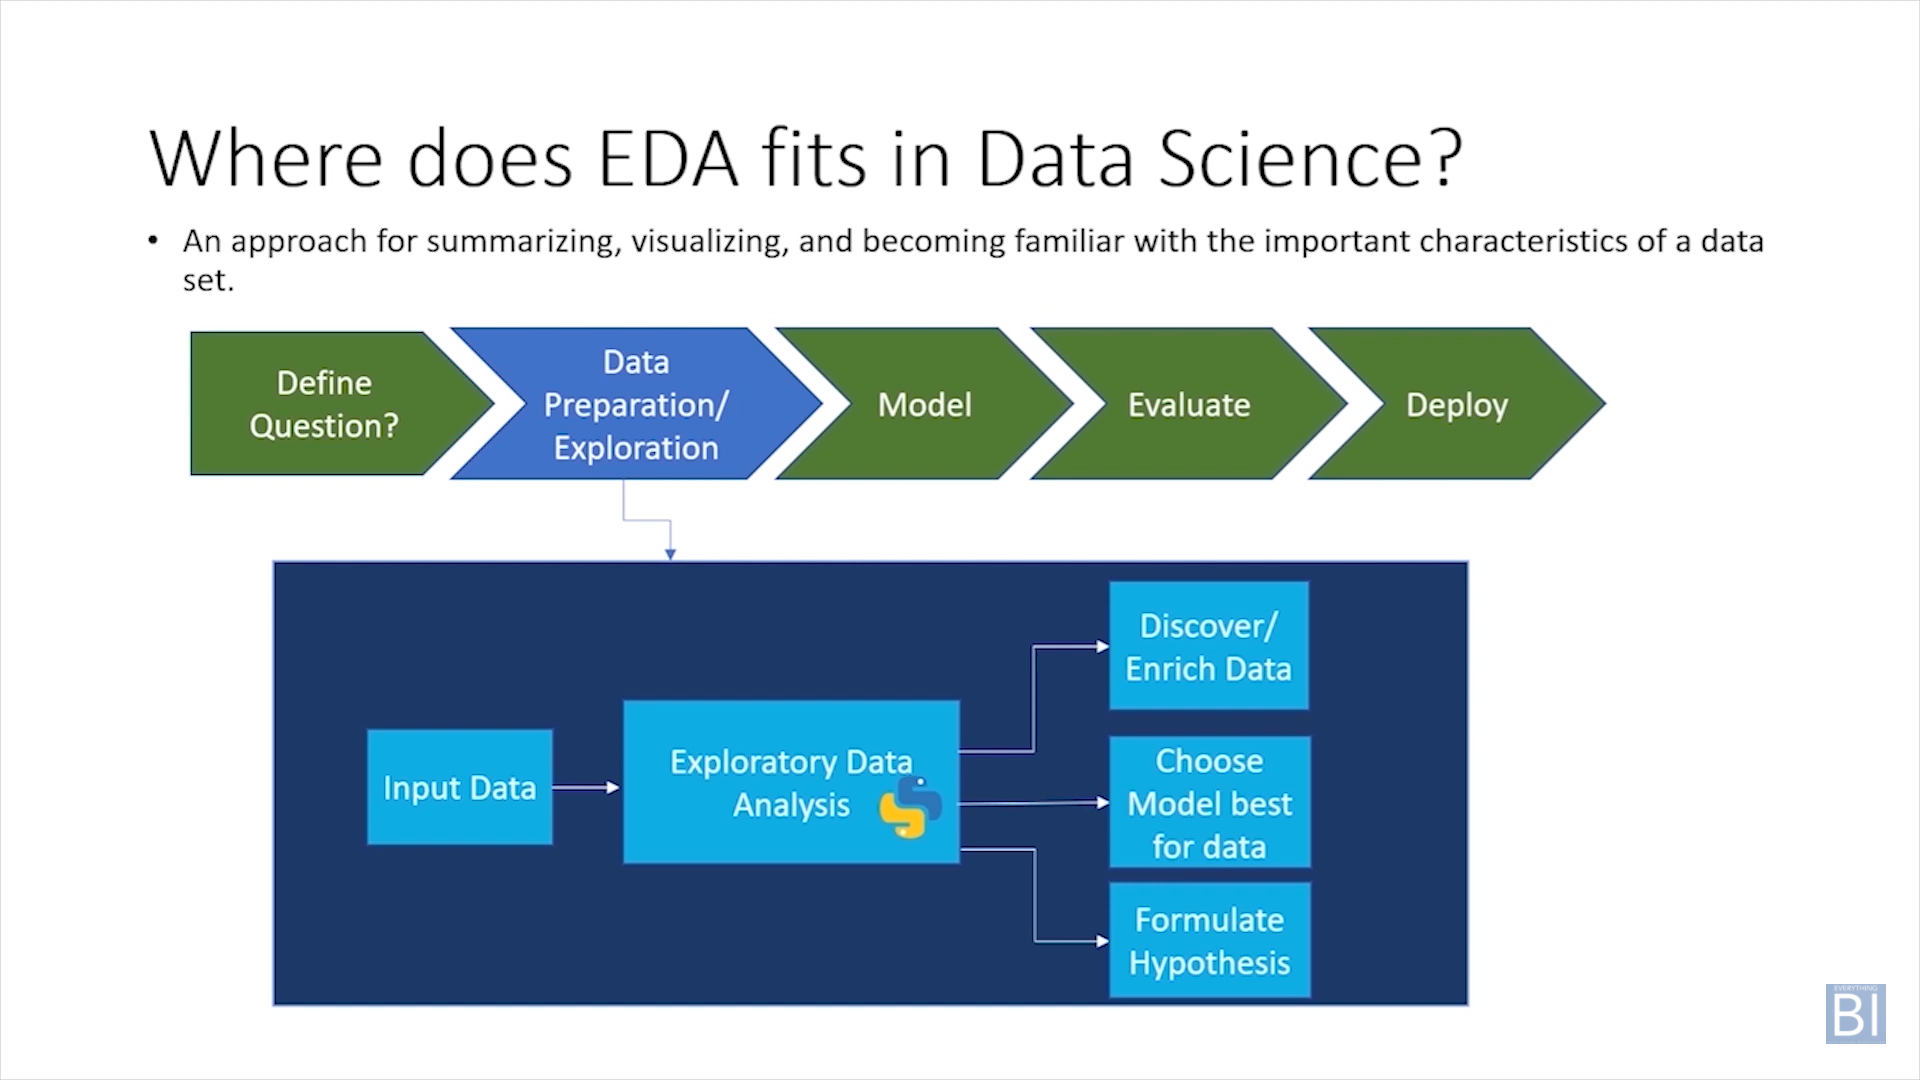

In [1]:
from IPython.display import Image
Image(filename='eda.png',width=600,height=600)

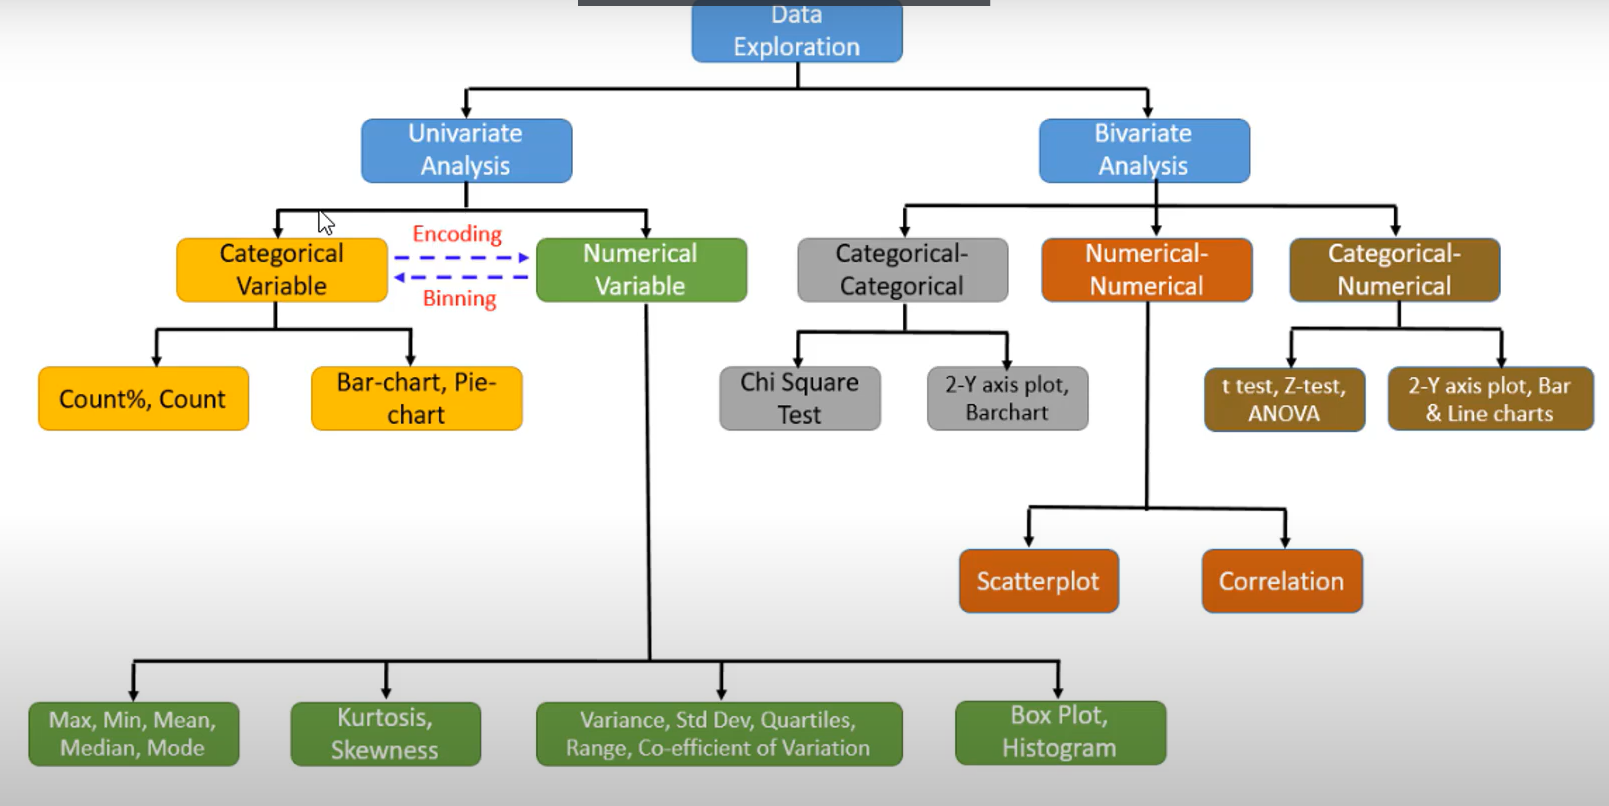

In [2]:
Image(filename='dataexp.png',width=600,height=600)

In [3]:
#to data cleaning and transformation
import pandas as pd
import numpy as np
#to visualize
import matplotlib.pyplot as plt
import seaborn as sns
#to test distribution and find correlation
from scipy.stats import norm
from scipy.stats import ttest_ind
import statistics
import scipy
from IPython.display import Image
sns.set(color_codes=True)

In [4]:
data = pd.read_excel('advworks.xlsx')
data.head()

productcategory productsubcategory                product   saleterritory  \
0        Clothing               Caps           AWC Logo Cap  United Kingdom   
1     Accessories              Locks             Cable Lock  United Kingdom   
2        Clothing             Gloves  Full-Finger Gloves, L  United Kingdom   
3        Clothing             Gloves  Full-Finger Gloves, L  United Kingdom   
4        Clothing             Gloves  Full-Finger Gloves, M  United Kingdom   

          Country    City     Sate      Customer     Employee  OrderCount  \
0  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   
1  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   
2  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   
3  United Kingdom  London  England  Linda Martin  Amy Alberts           1   
4  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   

   OrderDate  StandardCost  UnitPrice  UnitPriceDiscount  Discount  ListPrice  \
0 2012-06-30        6.9223     5.0136               0.02    1.4038     8.6442   
1 2012-06-30       10.3125    15.0000               0.00    0.0000    25.0000   
2 2012-06-30       15.6709    22.7940               0.00    0.0000    37.9900   
3 2012-06-30       15.6709    20.8945               0.05   16.7156    37.9900   
4 2012-06-30       15.6709    22.7940               0.00    0.0000    37.9900   

   SaleswithStandard   NetSales  OrderQuantity       Sales  
0            96.9122 -28.125608             14   68.786592  
1            61.8750  28.125000              6   90.000000  
2           125.3672  56.984800              8  182.352000  
3           250.7344  66.862000             16  317.596400  
4           109.6963  49.861700              7  159.558000

In [5]:
data.tail()

productcategory productsubcategory                     product  \
60875        Clothing             Shorts  Women's Mountain Shorts, L   
60876        Clothing             Shorts  Women's Mountain Shorts, L   
60877        Clothing             Shorts  Women's Mountain Shorts, M   
60878        Clothing             Shorts  Women's Mountain Shorts, S   
60879        Clothing             Shorts  Women's Mountain Shorts, S   

      saleterritory        Country     City     Sate          Customer  \
60875     Southeast  United States  Decatur  Georgia        Pamela Cox   
60876     Southeast  United States    Miami  Florida  Stephanie Conroy   
60877     Southeast  United States  Decatur  Georgia        Pamela Cox   
60878     Southeast  United States  Decatur  Georgia        Pamela Cox   
60879     Southeast  United States    Miami  Florida  Stephanie Conroy   

          Employee  OrderCount  OrderDate  StandardCost  UnitPrice  \
60875  Tsvi Reiter           1 2014-05-01       26.1763     41.994   
60876  Tsvi Reiter           1 2014-05-01       26.1763     41.994   
60877  Tsvi Reiter           1 2014-05-01       26.1763     41.994   
60878  Tsvi Reiter           1 2014-05-01       26.1763     41.994   
60879  Tsvi Reiter           1 2014-05-01       26.1763     41.994   

       UnitPriceDiscount  Discount  ListPrice  SaleswithStandard  NetSales  \
60875                0.0       0.0      69.99           209.4104  126.5416   
60876                0.0       0.0      69.99           157.0578   94.9062   
60877                0.0       0.0      69.99            78.5289   47.4531   
60878                0.0       0.0      69.99           130.8815   79.0885   
60879                0.0       0.0      69.99            78.5289   47.4531   

       OrderQuantity    Sales  
60875              8  335.952  
60876              6  251.964  
60877              3  125.982  
60878              5  209.970  
60879              3  125.982

In [6]:
data.shape

(60880, 20)

In [7]:
data.dtypes

productcategory               object
productsubcategory            object
product                       object
saleterritory                 object
Country                       object
City                          object
Sate                          object
Customer                      object
Employee                      object
OrderCount                     int64
OrderDate             datetime64[ns]
StandardCost                 float64
UnitPrice                    float64
UnitPriceDiscount            float64
Discount                     float64
ListPrice                    float64
SaleswithStandard            float64
NetSales                     float64
OrderQuantity                  int64
Sales                        float64
dtype: object

In [8]:
data.columns

Index(['productcategory', 'productsubcategory', 'product', 'saleterritory',
       'Country', 'City', 'Sate', 'Customer', 'Employee', 'OrderCount',
       'OrderDate', 'StandardCost', 'UnitPrice', 'UnitPriceDiscount',
       'Discount', 'ListPrice', 'SaleswithStandard', 'NetSales',
       'OrderQuantity', 'Sales'],
      dtype='object')

In [9]:
data.columns.values.tolist()

['productcategory',
 'productsubcategory',
 'product',
 'saleterritory',
 'Country',
 'City',
 'Sate',
 'Customer',
 'Employee',
 'OrderCount',
 'OrderDate',
 'StandardCost',
 'UnitPrice',
 'UnitPriceDiscount',
 'Discount',
 'ListPrice',
 'SaleswithStandard',
 'NetSales',
 'OrderQuantity',
 'Sales']

In [10]:
list(data)

['productcategory',
 'productsubcategory',
 'product',
 'saleterritory',
 'Country',
 'City',
 'Sate',
 'Customer',
 'Employee',
 'OrderCount',
 'OrderDate',
 'StandardCost',
 'UnitPrice',
 'UnitPriceDiscount',
 'Discount',
 'ListPrice',
 'SaleswithStandard',
 'NetSales',
 'OrderQuantity',
 'Sales']

In [11]:
[col for col in data.columns]

['productcategory',
 'productsubcategory',
 'product',
 'saleterritory',
 'Country',
 'City',
 'Sate',
 'Customer',
 'Employee',
 'OrderCount',
 'OrderDate',
 'StandardCost',
 'UnitPrice',
 'UnitPriceDiscount',
 'Discount',
 'ListPrice',
 'SaleswithStandard',
 'NetSales',
 'OrderQuantity',
 'Sales']

In [12]:
List = []
for col in data.columns:
    List.append(col)
List

['productcategory',
 'productsubcategory',
 'product',
 'saleterritory',
 'Country',
 'City',
 'Sate',
 'Customer',
 'Employee',
 'OrderCount',
 'OrderDate',
 'StandardCost',
 'UnitPrice',
 'UnitPriceDiscount',
 'Discount',
 'ListPrice',
 'SaleswithStandard',
 'NetSales',
 'OrderQuantity',
 'Sales']

In [13]:
#Lets drop the irrelevant columns
data = data[['productcategory', 'saleterritory','Country', 'OrderCount','OrderDate', 'Discount','OrderQuantity', 'Sales']]
data.head()

productcategory   saleterritory         Country  OrderCount  OrderDate  \
0        Clothing  United Kingdom  United Kingdom           1 2012-06-30   
1     Accessories  United Kingdom  United Kingdom           1 2012-06-30   
2        Clothing  United Kingdom  United Kingdom           1 2012-06-30   
3        Clothing  United Kingdom  United Kingdom           1 2012-06-30   
4        Clothing  United Kingdom  United Kingdom           1 2012-06-30   

   Discount  OrderQuantity       Sales  
0    1.4038             14   68.786592  
1    0.0000              6   90.000000  
2    0.0000              8  182.352000  
3   16.7156             16  317.596400  
4    0.0000              7  159.558000

In [14]:
data = data.rename(columns={'productcategory':'category','saleterritory':'territory','OrderQuantity':'quantity','Sales':'sales',
                           'Country':'country','OrderCount':'ordercount','OrderDate':'orderdate','Discount':'discount'})
data.head()

category       territory         country  ordercount  orderdate  \
0     Clothing  United Kingdom  United Kingdom           1 2012-06-30   
1  Accessories  United Kingdom  United Kingdom           1 2012-06-30   
2     Clothing  United Kingdom  United Kingdom           1 2012-06-30   
3     Clothing  United Kingdom  United Kingdom           1 2012-06-30   
4     Clothing  United Kingdom  United Kingdom           1 2012-06-30   

   discount  quantity       sales  
0    1.4038        14   68.786592  
1    0.0000         6   90.000000  
2    0.0000         8  182.352000  
3   16.7156        16  317.596400  
4    0.0000         7  159.558000

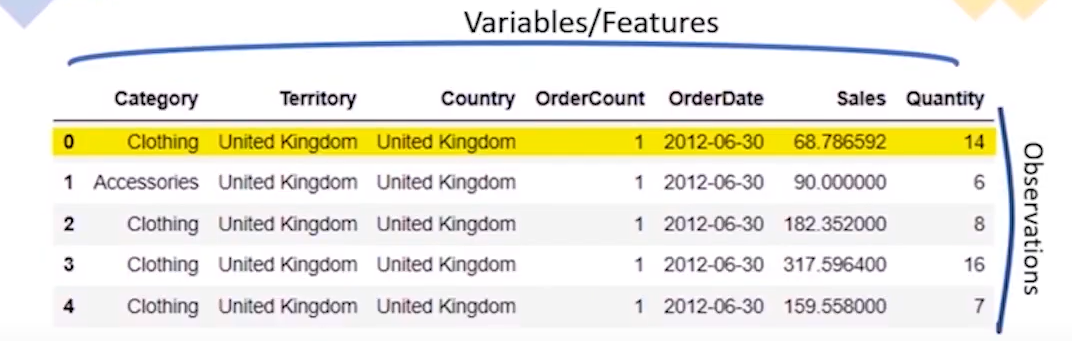

In [15]:
Image(filename='var&ob.png',width=600,height=600)
#variables/features are your columns
#Observation are your rows

- Most common variables we work with are categorical and numeric
- category and territory column is an example of Categorical/Qualitative 
- sales and quantity column is an example of Numeric/Quantitative
- Numeric variables can be continuous and discrete. Quantity is discrete as it is an exact number. Sales is continous as it includes fractions

In [16]:
#Quantity is discrete as it is an exact number. Each observation falls ona value on an integer
data.quantity.unique()

array([14,  6,  8, 16,  7,  2,  1,  3,  4,  5, 10, 13, 12, 18, 15, 11,  9,
       17, 23, 34, 19, 33, 24, 41, 38, 27, 26, 21, 20, 31, 25, 22, 32, 28,
       29, 39, 44, 36, 40, 30, 35], dtype=int64)

In [17]:
data.sales.unique()

array([  68.786592,   90.      ,  182.352   , ..., 2466.4185  ,
        436.69505 ,   58.383   ])

In [18]:
data.shape

(60880, 8)

**Lets look at our data stats, mainly focus on sales**

In [19]:
#Inner quartile range(IQR)
#The difference between 75th and 25th percentiles, ie between upper and lower quartiles, IQR=Q3-Q1
#1466.01-127.80 = 1338.21
#Boxplot use this range with the line that represents the median, in the middle
data[['sales','quantity']].describe()

sales      quantity
count  60880.000000  60880.000000
mean    1322.071356      3.523587
std     2124.171872      3.033950
min        1.374000      1.000000
25%      127.800000      2.000000
50%      461.694000      3.000000
75%     1466.010000      4.000000
max    27893.619000     44.000000

In [20]:
print("Calulate mode")
data['sales'].mode()

Calulate mode


0    419.4589
dtype: float64

**Lets look at data distribution. Check skewness inour data**

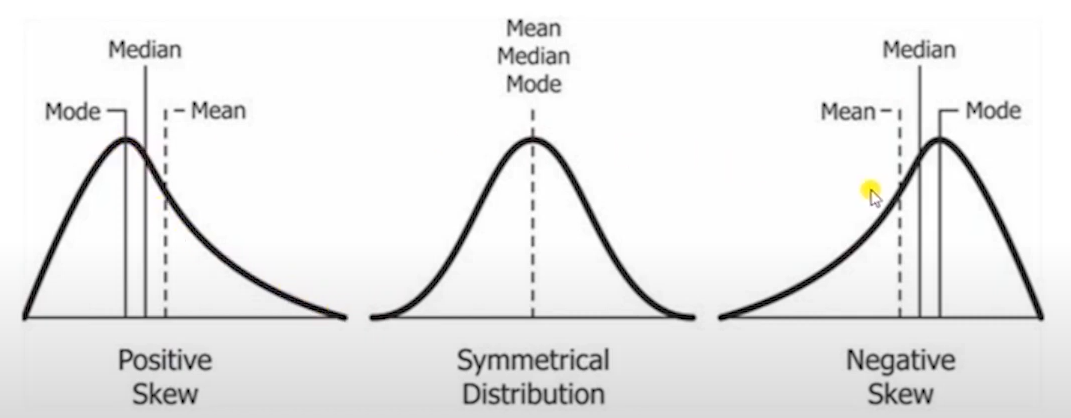

In [21]:
Image(filename='skew.png',width=600,height=600)
#Positive skewness if peak is left to mean and tail on the right side
#Negative skewness if peak is right to mean and tail on the left side

<AxesSubplot:xlabel='sales', ylabel='Density'>

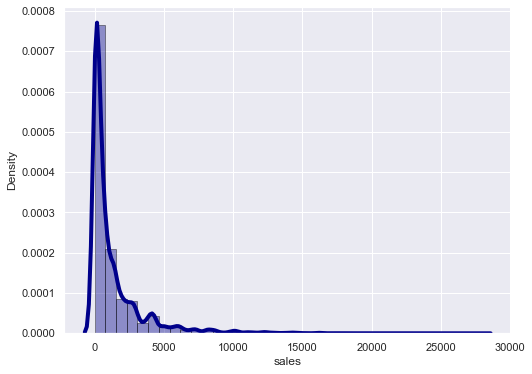

In [22]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning) #supressing the warning as distplot is deprecated

#Density plot and histogram of sales amount, showcases positive skewness. Tail is to the right of mean
plt.figure(figsize=(8,6))
sns.distplot(data['sales'],hist=True,kde=True,bins=int(180/5),
             color='darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})
#Our data is unimodal since it has one peaks.
#More than one peak - Bimodal
#probability density function (PDF), or density of a continuous random variable, is a function that describes the relative likelihood for this random variable to take on a given value

<AxesSubplot:xlabel='sales', ylabel='Count'>

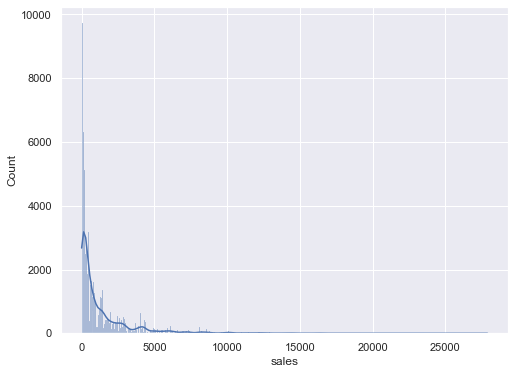

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(data['sales'],kde=True)

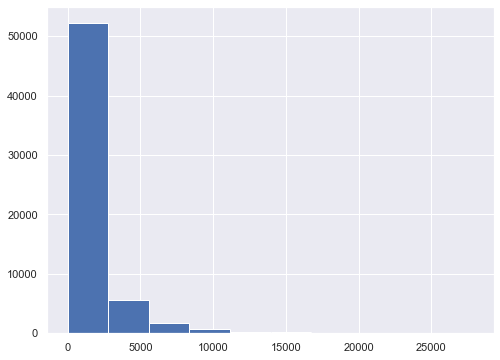

In [24]:
plt.figure(figsize=(8,6))
plt.hist(data['sales'])
plt.show()

-1393.2382499999999 29288.231249999993
[-1393.23825    -1083.32441667  -773.41058333  -463.49675
  -153.58291667   156.33091667   466.24475      776.15858333
  1086.07241667  1395.98625     1705.90008333  2015.81391667
  2325.72775     2635.64158333  2945.55541667  3255.46925
  3565.38308333  3875.29691667  4185.21075     4495.12458333
  4805.03841667  5114.95225     5424.86608333  5734.77991667
  6044.69375     6354.60758333  6664.52141667  6974.43525
  7284.34908333  7594.26291667  7904.17675     8214.09058333
  8524.00441667  8833.91825     9143.83208333  9453.74591667
  9763.65975    10073.57358333 10383.48741667 10693.40125
 11003.31508333 11313.22891667 11623.14275    11933.05658333
 12242.97041667 12552.88425    12862.79808333 13172.71191667
 13482.62575    13792.53958333 14102.45341667 14412.36725
 14722.28108333 15032.19491667 15342.10875    15652.02258333
 15961.93641667 16271.85025    16581.76408333 16891.67791667
 17201.59175    17511.50558333 17821.41941667 18131.33325
 18

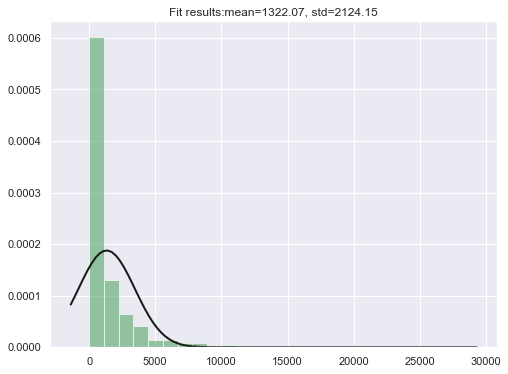

In [25]:
#Check sales data distribution
data_sales = data['sales']

#Fit a normal distribution to the data
mn,std = norm.fit(data_sales)

#plot the histogram
plt.figure(figsize=(8,6))
plt.hist(data_sales,bins=25,density=True,alpha=0.6,color='g')

#Plot the probability density function
xmin,xmax = plt.xlim() #The xlim() function in pyplot module of matplotlib library is used to get or set the x-limits of the current axes
print(xmin,xmax)
x = np.linspace(xmin,xmax,100)
print(x)
p = norm.pdf(x,mn,std)
plt.plot(x,p,'k',linewidth=2)
plt.title("Fit results:mean=%0.2f, std=%0.2f"%(mn,std))
plt.show()

**Detect Outliers in Sales**

<AxesSubplot:xlabel='sales'>

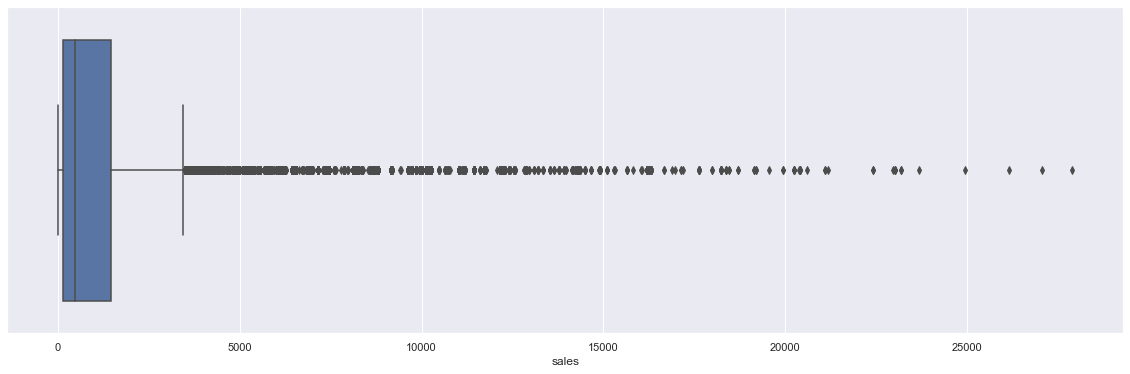

In [26]:
#Inner quartile range(IQR)
#The difference between 75th and 25th percentiles, ie between upper and lower quartiles, IQR=Q3-Q1
#Boxplot use IQR range with the line that represents the median, in the middle
#The whiskers = Q3+1.5*IQR. Any value outside the whiskers is called the outlier. We will use this technique to remove outliers from our dataframe
#Detecting outliers

plt.figure(figsize=(20,6))
sns.boxplot(x=data['sales'])

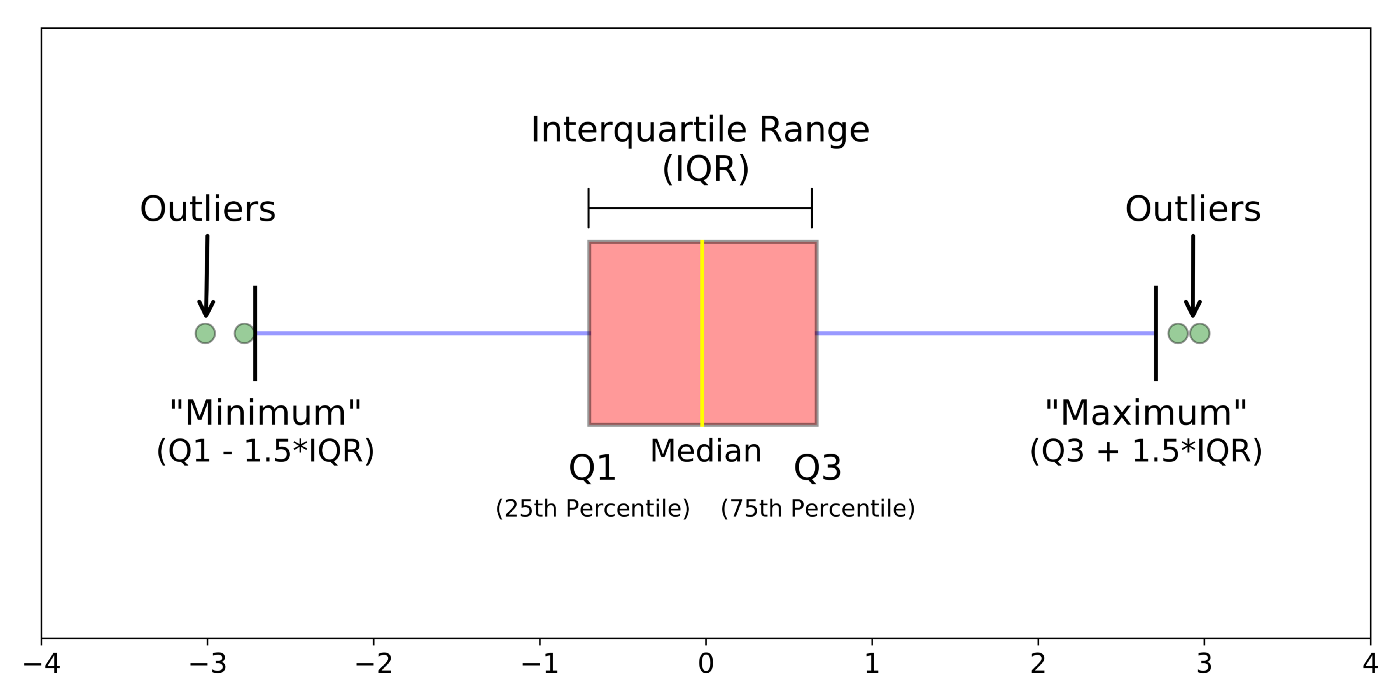

In [27]:
Image(filename='boxplot.png',width=600,height=600)

**Remove Outliers with below function**

In [28]:
# IQR = 1466.01-127.80 = 1338.21

Q1 = data.sales.quantile(0.25)
Q3 = data.sales.quantile(0.75)
print("75% " + str(Q3))
print("25% " + str(Q1))
print('Median: '+ str(data.sales.median()) )
IQR = Q3 - Q1
print("Inner Quartile range: " + str(IQR))

75% 1466.01
25% 127.8
Median: 461.694
Inner Quartile range: 1338.21


In [29]:
#These are the values will be removed by below function

LTV = Q1 - 1.5 * IQR
UTV = Q3 + 1.5 * IQR
print(LTV)
print(UTV)

-1879.515
3473.325


In [30]:
data.describe().columns

Index(['ordercount', 'discount', 'quantity', 'sales'], dtype='object')

In [31]:
def outlier_remove(data):
    for i in data.describe().columns:
        Q1 = data.describe().at['25%',i]
        Q3 = data.describe().at['75%',i]
        IQR = Q3-Q1
        LTV = Q1 - 1.5*IQR
        UTV = Q3 + 1.5*IQR
        x = np.array(data[i]) #all column values converted to array
        p =[]
        for j in x:
            if j < LTV or j > UTV:
                p.append(data[i].median())
            else:
                p.append(j)
        data[i] = p
    return data

In [32]:
#Detect and remove outliers
outlier_remove(data)

category       territory         country  ordercount  orderdate  \
0         Clothing  United Kingdom  United Kingdom         1.0 2012-06-30   
1      Accessories  United Kingdom  United Kingdom         1.0 2012-06-30   
2         Clothing  United Kingdom  United Kingdom         1.0 2012-06-30   
3         Clothing  United Kingdom  United Kingdom         1.0 2012-06-30   
4         Clothing  United Kingdom  United Kingdom         1.0 2012-06-30   
...            ...             ...             ...         ...        ...   
60875     Clothing       Southeast   United States         1.0 2014-05-01   
60876     Clothing       Southeast   United States         1.0 2014-05-01   
60877     Clothing       Southeast   United States         1.0 2014-05-01   
60878     Clothing       Southeast   United States         1.0 2014-05-01   
60879     Clothing       Southeast   United States         1.0 2014-05-01   

       discount  quantity       sales  
0           0.0       3.0   68.786592  
1           0.0       6.0   90.000000  
2           0.0       3.0  182.352000  
3           0.0       3.0  317.596400  
4           0.0       7.0  159.558000  
...         ...       ...         ...  
60875       0.0       3.0  335.952000  
60876       0.0       6.0  251.964000  
60877       0.0       3.0  125.982000  
60878       0.0       5.0  209.970000  
60879       0.0       3.0  125.982000  

[60880 rows x 8 columns]

<AxesSubplot:xlabel='sales'>

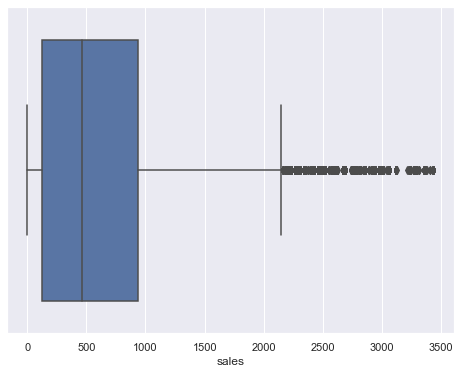

In [33]:
#Lets plot a box plot see if there is any improvement
#Now we see lot less outliers than before
plt.figure(figsize=(8,6))
sns.boxplot(x=data['sales'])

In [34]:
Q1 = data.sales.quantile(0.25)
Q3 = data.sales.quantile(0.75)
print("75% " + str(Q3))
print("25% " + str(Q1))
print('Median: '+ str(data.sales.median()) )
IQR = Q3 - Q1
print("Inner Quartile range: " + str(IQR))

75% 939.588
25% 127.8
Median: 461.694
Inner Quartile range: 811.788


**Drop duplicates**

In [35]:
data = data.drop_duplicates()
data.head()

category       territory         country  ordercount  orderdate  \
0     Clothing  United Kingdom  United Kingdom         1.0 2012-06-30   
1  Accessories  United Kingdom  United Kingdom         1.0 2012-06-30   
2     Clothing  United Kingdom  United Kingdom         1.0 2012-06-30   
3     Clothing  United Kingdom  United Kingdom         1.0 2012-06-30   
4     Clothing  United Kingdom  United Kingdom         1.0 2012-06-30   

   discount  quantity       sales  
0       0.0       3.0   68.786592  
1       0.0       6.0   90.000000  
2       0.0       3.0  182.352000  
3       0.0       3.0  317.596400  
4       0.0       7.0  159.558000

In [36]:
data.shape

(29580, 8)

In [37]:
data.count()

category      29543
territory     29580
country       29580
ordercount    29580
orderdate     29580
discount      29580
quantity      29580
sales         29580
dtype: int64

**Check for null values or missing values**

In [38]:
data[data.isnull().any(axis=1)]

category territory  country  ordercount  orderdate  discount  quantity  \
581        NaN   Germany  Germany         1.0 2014-02-28       0.0       2.0   
582        NaN   Germany  Germany         1.0 2014-02-28       0.0       1.0   
42825      NaN   Germany  Germany         1.0 2013-05-30       0.0       2.0   
42826      NaN   Germany  Germany         1.0 2013-05-30       0.0       2.0   
42827      NaN   Germany  Germany         1.0 2013-05-30       0.0       2.0   
42975      NaN   Germany  Germany         1.0 2013-06-30       0.0       3.0   
42976      NaN   Germany  Germany         1.0 2013-06-30       0.0       2.0   
42977      NaN   Germany  Germany         1.0 2013-06-30       0.0       1.0   
42978      NaN   Germany  Germany         1.0 2013-06-30       0.0       2.0   
42979      NaN   Germany  Germany         1.0 2013-06-30       0.0       2.0   
42980      NaN   Germany  Germany         1.0 2013-06-30       0.0       3.0   
42981      NaN   Germany  Germany         1.0 2013-06-30       0.0       1.0   
43156      NaN   Germany  Germany         1.0 2013-07-31       0.0       2.0   
43157      NaN   Germany  Germany         1.0 2013-07-31       0.0       6.0   
43158      NaN   Germany  Germany         1.0 2013-07-31       0.0       7.0   
43159      NaN   Germany  Germany         1.0 2013-07-31       0.0       2.0   
43160      NaN   Germany  Germany         1.0 2013-07-31       0.0       4.0   
43161      NaN   Germany  Germany         1.0 2013-07-31       0.0       1.0   
43344      NaN   Germany  Germany         1.0 2013-08-30       0.0       2.0   
43345      NaN   Germany  Germany         1.0 2013-08-30       0.0       1.0   
43346      NaN   Germany  Germany         1.0 2013-08-30       0.0       1.0   
43469      NaN   Germany  Germany         1.0 2013-09-30       0.0       5.0   
43470      NaN   Germany  Germany         1.0 2013-09-30       0.0       1.0   
43471      NaN   Germany  Germany         1.0 2013-09-30       0.0       6.0   
43472      NaN   Germany  Germany         1.0 2013-09-30       0.0       1.0   
43640      NaN   Germany  Germany         1.0 2013-10-30       0.0       3.0   
43771      NaN   Germany  Germany         1.0 2013-11-30       0.0       1.0   
43772      NaN   Germany  Germany         1.0 2013-11-30       0.0       3.0   
43879      NaN   Germany  Germany         1.0 2013-12-31       0.0       3.0   
44017      NaN   Germany  Germany         1.0 2014-01-28       0.0       4.0   
44104      NaN   Germany  Germany         1.0 2014-02-28       0.0       1.0   
44231      NaN   Germany  Germany         1.0 2014-03-30       0.0       4.0   
44232      NaN   Germany  Germany         1.0 2014-03-30       0.0       3.0   
44233      NaN   Germany  Germany         1.0 2014-03-30       0.0       1.0   
44406      NaN   Germany  Germany         1.0 2014-04-30       0.0       2.0   
44407      NaN   Germany  Germany         1.0 2014-04-30       0.0       4.0   
44408      NaN   Germany  Germany         1.0 2014-04-30       0.0       3.0   

           sales  
581     116.9870  
582     563.7528  
42825   116.9870  
42826  1127.5056  
42827   528.4488  
42975   438.6915  
42976   116.9870  
42977    83.2981  
42978   367.6098  
42979   499.0856  
42980   461.6940  
42981   249.5428  
43156    77.9870  
43157   148.1610  
43158   341.2045  
43159   116.9870  
43160   698.6340  
43161   258.0824  
43344  1127.5056  
43345   249.5428  
43346   563.7528  
43469   243.7175  
43470    83.2981  
43471  3382.5168  
43472    15.0000  
43640   271.6285  
43771   563.7528  
43772   461.6940  
43879   461.6940  
44017    98.7740  
44104   249.5428  
44231   194.9740  
44232   461.6940  
44233   249.5428  
44406    97.4870  
44407   233.9740  
44408   197.5480

In [39]:
#Replace missing value with the most frequent value of that column
data['category'].value_counts()

Components     11268
Clothing        7733
Bikes           7048
Accessories     3494
Name: category, dtype: int64

In [40]:
data['category'].value_counts().index[0]

'Components'

In [41]:
data['category'].fillna(data['category'].value_counts().index[0],inplace=True)

C:\Users\Priya\Python\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [42]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [category, territory, country, ordercount, orderdate, discount, quantity, sales]
Index: []

In [43]:
data.count()

category      29580
territory     29580
country       29580
ordercount    29580
orderdate     29580
discount      29580
quantity      29580
sales         29580
dtype: int64

**Univariate analysis: Categorical variable with count of values**

In [44]:
#Analysis of one variable with count
data.category.value_counts()

Components     11305
Clothing        7733
Bikes           7048
Accessories     3494
Name: category, dtype: int64

Text(0.5, 0, 'Category')

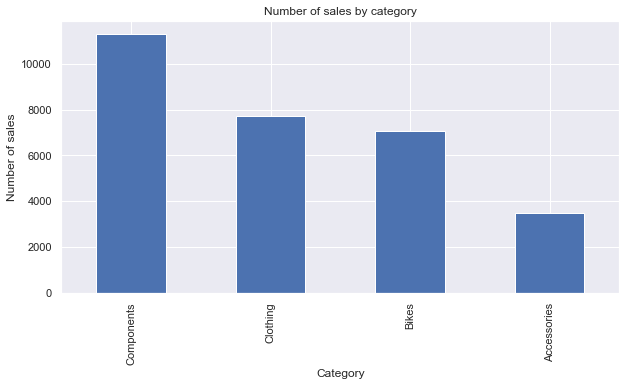

In [45]:
data.category.value_counts().plot(kind='bar',figsize=(10,5))
plt.title("Number of sales by category")
plt.ylabel("Number of sales")
plt.xlabel("Category")

Text(0.5, 0, 'Category')

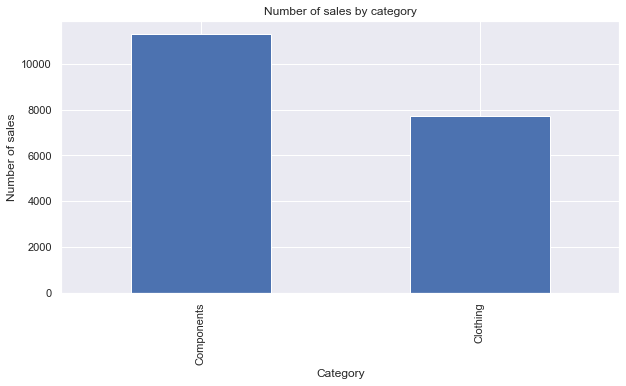

In [46]:
data.category.value_counts().nlargest(2).plot(kind='bar',figsize=(10,5))
plt.title("Number of sales by category")
plt.ylabel("Number of sales")
plt.xlabel("Category")

Text(0.5, 0, 'Country')

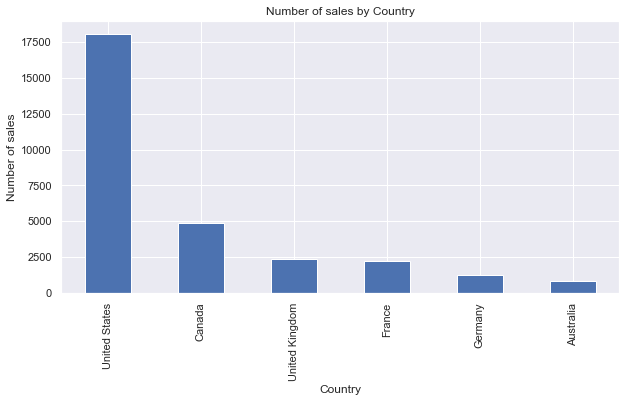

In [47]:
data.country.value_counts().plot(kind='bar',figsize=(10,5))
plt.title("Number of sales by Country")
plt.ylabel("Number of sales")
plt.xlabel("Country")

In [48]:
#Grouping countries by sales to get actual sales numbers
country_sales = data.groupby('country')['sales'].sum()
country_sales

country
Australia         4.035234e+05
Canada            3.004140e+06
France            1.390809e+06
Germany           7.021398e+05
United Kingdom    1.498666e+06
United States     1.147902e+07
Name: sales, dtype: float64

In [49]:
country_sales = data.groupby('country')['sales'].sum().sort_values(ascending=False)
pd.options.display.float_format = '{:,.2f}'.format
country_sales

country
United States    11,479,024.59
Canada            3,004,139.64
United Kingdom    1,498,666.11
France            1,390,809.34
Germany             702,139.83
Australia           403,523.43
Name: sales, dtype: float64

**find frequrncy of each category**

In [50]:
tab = pd.crosstab(index=data['category'],columns=['Relative frequency'])
print(tab)
tab/tab.sum()
#ex:for category 'components': 11305/29580 = 0.38

col_0        Relative frequency
category                       
Accessories                3494
Bikes                      7048
Clothing                   7733
Components                11305


col_0        Relative frequency
category                       
Accessories                0.12
Bikes                      0.24
Clothing                   0.26
Components                 0.38

**Bivariate Analysis:Two variables**

In [51]:
ct = pd.crosstab(data['category'],data['country'])
ct

country      Australia  Canada  France  Germany  United Kingdom  United States
category                                                                      
Accessories        125     604     281      210             277           1997
Bikes              174    1025     490      291             606           4462
Clothing           211    1318     597      333             585           4689
Components         309    1898     879      424             868           6927

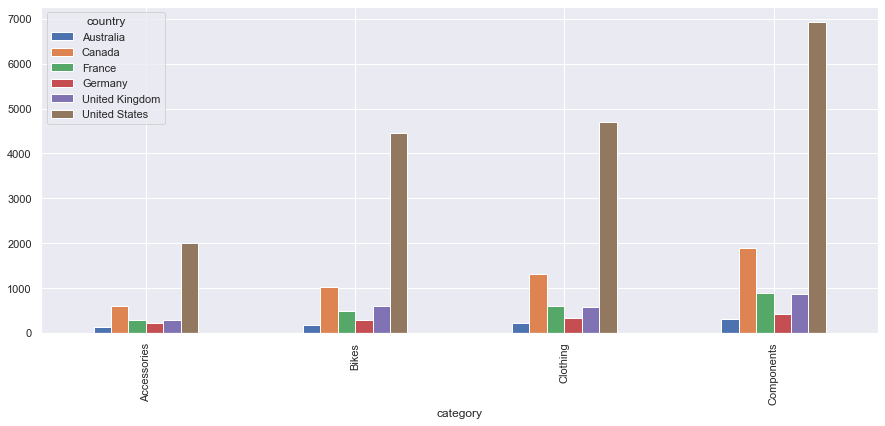

In [52]:
ct.plot.bar(figsize=(15,6))
plt.show()

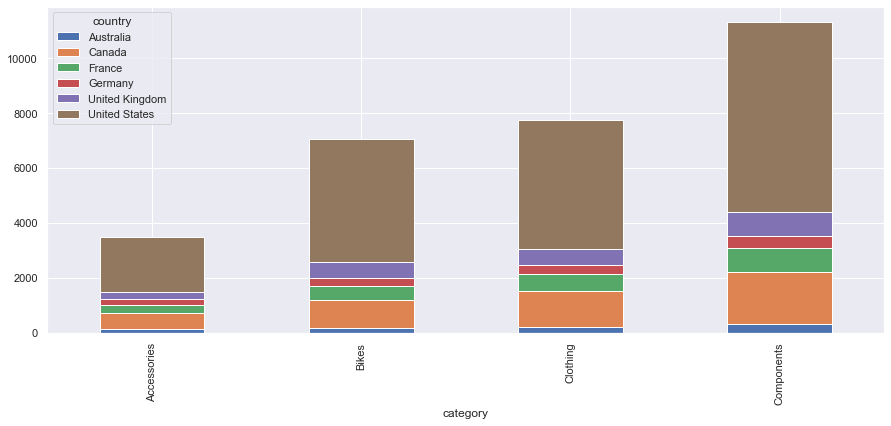

In [53]:
ct.plot.bar(stacked=True,figsize=(15,6))
plt.show()

In [54]:
stacked = ct.stack()
stacked

category     country       
Accessories  Australia          125
             Canada             604
             France             281
             Germany            210
             United Kingdom     277
             United States     1997
Bikes        Australia          174
             Canada            1025
             France             490
             Germany            291
             United Kingdom     606
             United States     4462
Clothing     Australia          211
             Canada            1318
             France             597
             Germany            333
             United Kingdom     585
             United States     4689
Components   Australia          309
             Canada            1898
             France             879
             Germany            424
             United Kingdom     868
             United States     6927
dtype: int64

In [55]:
stacked = ct.stack().reset_index()
stacked

category         country     0
0   Accessories       Australia   125
1   Accessories          Canada   604
2   Accessories          France   281
3   Accessories         Germany   210
4   Accessories  United Kingdom   277
5   Accessories   United States  1997
6         Bikes       Australia   174
7         Bikes          Canada  1025
8         Bikes          France   490
9         Bikes         Germany   291
10        Bikes  United Kingdom   606
11        Bikes   United States  4462
12     Clothing       Australia   211
13     Clothing          Canada  1318
14     Clothing          France   597
15     Clothing         Germany   333
16     Clothing  United Kingdom   585
17     Clothing   United States  4689
18   Components       Australia   309
19   Components          Canada  1898
20   Components          France   879
21   Components         Germany   424
22   Components  United Kingdom   868
23   Components   United States  6927

In [56]:
stacked = ct.stack().reset_index().rename(columns={0:'value'})
stacked

category         country  value
0   Accessories       Australia    125
1   Accessories          Canada    604
2   Accessories          France    281
3   Accessories         Germany    210
4   Accessories  United Kingdom    277
5   Accessories   United States   1997
6         Bikes       Australia    174
7         Bikes          Canada   1025
8         Bikes          France    490
9         Bikes         Germany    291
10        Bikes  United Kingdom    606
11        Bikes   United States   4462
12     Clothing       Australia    211
13     Clothing          Canada   1318
14     Clothing          France    597
15     Clothing         Germany    333
16     Clothing  United Kingdom    585
17     Clothing   United States   4689
18   Components       Australia    309
19   Components          Canada   1898
20   Components          France    879
21   Components         Germany    424
22   Components  United Kingdom    868
23   Components   United States   6927

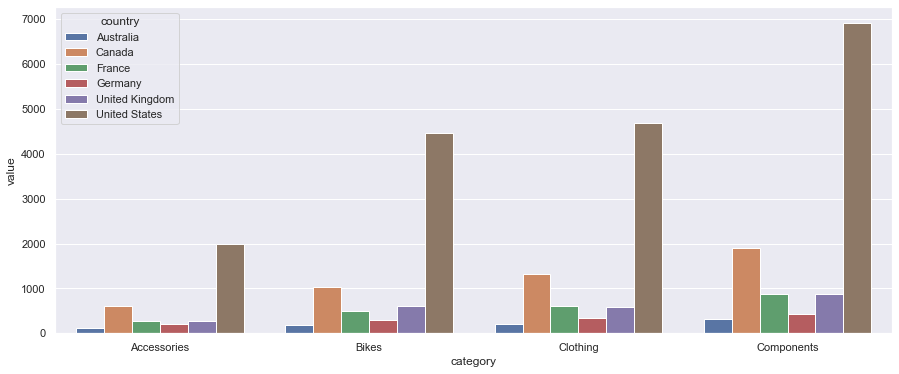

In [57]:
plt.figure(figsize=(15,6))
bi = sns.barplot(x=stacked.category,y=stacked.value,hue=stacked.country)

**Bivariate continues with two categorical and numeric variable**

In [58]:
bi_v = data.groupby(['category','country']).mean().reset_index()
bi_v

category         country  ordercount  discount  quantity    sales
0   Accessories       Australia        1.00      0.00      3.78   143.69
1   Accessories          Canada        1.00      0.00      3.63   132.39
2   Accessories          France        1.00      0.00      3.67   152.80
3   Accessories         Germany        1.00      0.00      3.70   152.59
4   Accessories  United Kingdom        1.00      0.00      3.62   131.73
5   Accessories   United States        1.00      0.00      3.52   114.44
6         Bikes       Australia        1.00      0.00      2.51 1,342.06
7         Bikes          Canada        1.00      0.00      2.98 1,470.15
8         Bikes          France        1.00      0.00      2.97 1,479.24
9         Bikes         Germany        1.00      0.00      2.67 1,376.66
10        Bikes  United Kingdom        1.00      0.00      2.80 1,473.10
11        Bikes   United States        1.00      0.00      2.97 1,444.59
12     Clothing       Australia        1.00      0.00      3.56   156.46
13     Clothing          Canada        1.00      0.00      3.49   172.93
14     Clothing          France        1.00      0.00      3.59   169.20
15     Clothing         Germany        1.00      0.00      3.64   175.41
16     Clothing  United Kingdom        1.00      0.00      3.61   162.60
17     Clothing   United States        1.00      0.00      3.46   158.25
18   Components       Australia        1.00      0.00      2.24   385.21
19   Components          Canada        1.00      0.00      2.85   626.63
20   Components          France        1.00      0.00      2.83   593.90
21   Components         Germany        1.00      0.00      2.42   497.82
22   Components  United Kingdom        1.00      0.00      2.69   546.49
23   Components   United States        1.00      0.00      2.71   586.50

<AxesSubplot:xlabel='category,country'>

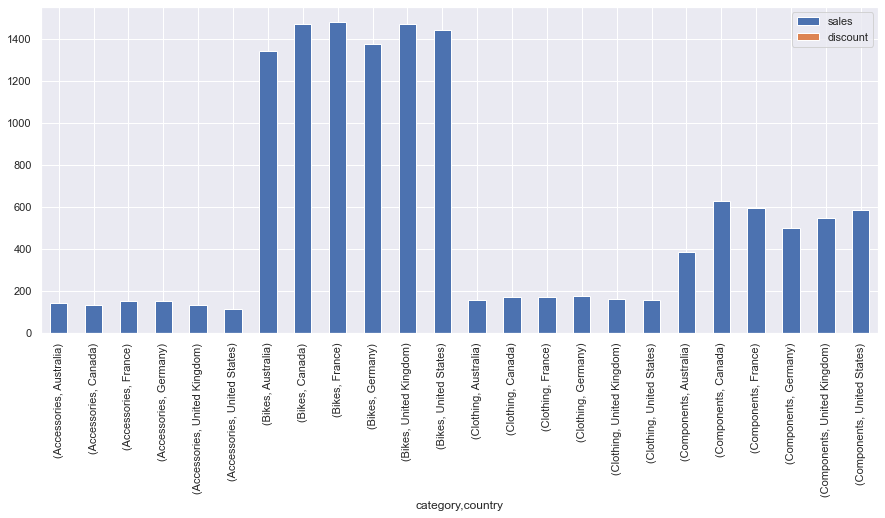

In [59]:
bi_v = data.groupby(['category','country']).mean()[['sales','discount']]
bi_v.plot.bar(stacked=True,figsize=(15,6))

In [60]:
#here discount values are removed while detecting and removing outliers
#now import fresh data
data1 = pd.read_excel('advworks.xlsx')
data1.head()

productcategory productsubcategory                product   saleterritory  \
0        Clothing               Caps           AWC Logo Cap  United Kingdom   
1     Accessories              Locks             Cable Lock  United Kingdom   
2        Clothing             Gloves  Full-Finger Gloves, L  United Kingdom   
3        Clothing             Gloves  Full-Finger Gloves, L  United Kingdom   
4        Clothing             Gloves  Full-Finger Gloves, M  United Kingdom   

          Country    City     Sate      Customer     Employee  OrderCount  \
0  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   
1  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   
2  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   
3  United Kingdom  London  England  Linda Martin  Amy Alberts           1   
4  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   

   OrderDate  StandardCost  UnitPrice  UnitPriceDiscount  Discount  ListPrice  \
0 2012-06-30          6.92       5.01               0.02      1.40       8.64   
1 2012-06-30         10.31      15.00               0.00      0.00      25.00   
2 2012-06-30         15.67      22.79               0.00      0.00      37.99   
3 2012-06-30         15.67      20.89               0.05     16.72      37.99   
4 2012-06-30         15.67      22.79               0.00      0.00      37.99   

   SaleswithStandard  NetSales  OrderQuantity  Sales  
0              96.91    -28.13             14  68.79  
1              61.88     28.12              6  90.00  
2             125.37     56.98              8 182.35  
3             250.73     66.86             16 317.60  
4             109.70     49.86              7 159.56

In [61]:
bi_v = data1.groupby(['productcategory','Country']).mean()[['Sales','Discount']]
#d_v = bi_v[bi_v['Discount']>0]
#d_v
bi_v

Sales  Discount
productcategory Country                          
Accessories     Australia        137.63      0.15
                Canada           115.02      1.14
                France           148.25      2.81
                Germany          144.97      2.41
                United Kingdom   127.14      1.75
                United States    101.31      1.14
Bikes           Australia      1,721.48     36.48
                Canada         2,619.63     17.63
                France         3,032.93     31.70
                Germany        2,453.13     45.83
                United Kingdom 2,566.50     22.15
                United States  2,723.90     17.79
Clothing        Australia        151.65      1.12
                Canada           149.13      1.60
                France           158.73      1.75
                Germany          170.12      2.48
                United Kingdom   156.56      1.84
                United States    139.27      1.71
Components      Australia        418.18      0.29
                Canada           653.60      0.52
                France           710.81      0.31
                Germany          627.15      0.00
                United Kingdom   647.72      0.68
                United States    624.45      0.18

<AxesSubplot:xlabel='productcategory,Country'>

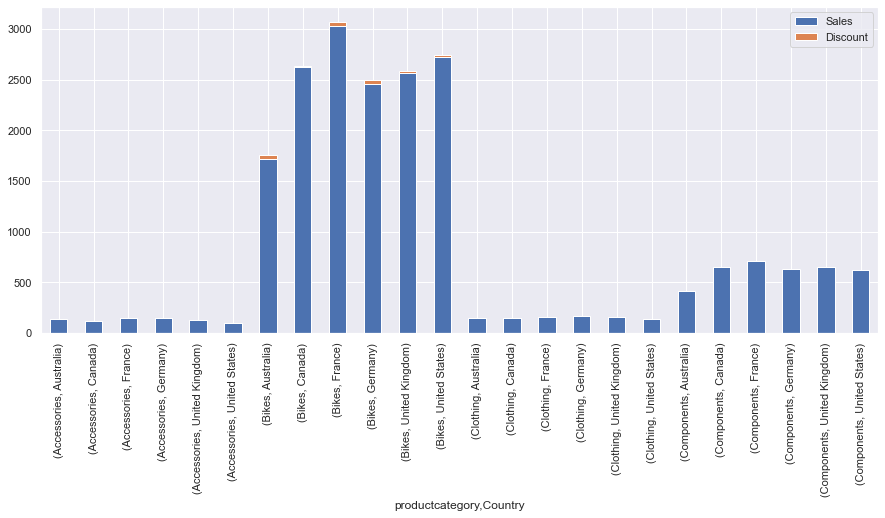

In [62]:
bi_v.plot.bar(stacked=True,figsize=(15,6))

- By convention we plot the independent variable on X-axis and dependent variable on Y-axis
- Lets say we hypothesis that change in Discount may affect the Sales. As we offer more discount it yield in higher sales.
- We think that a change in sales doesnt have impact on Discount. Sales maybe dependent of discount or there maybe a causative relationship

**Interpreting the value of p**
- 0.9 to 1 positive or negative indicates a very strong correlation
- 0.7 to 0.9 positive or negative indicates a strong correlation
- 0.5 to 0.7 positive or negative indicates a moderate correlation
- 0.3 to 0.5 positive or negative indicates a weak correlation
- 0 to 0.3 positive or negative indicates a negligible correlation

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

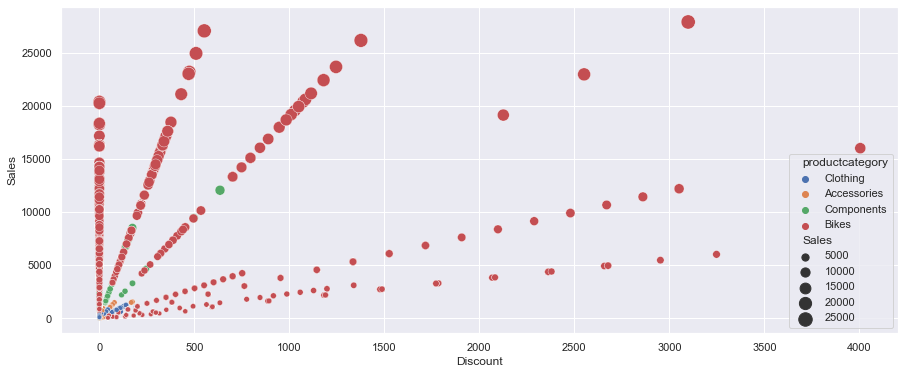

In [63]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data1, x='Discount',y='Sales',hue='productcategory',size='Sales',sizes=(20,200),palette='deep',legend='auto')

<AxesSubplot:xlabel='UnitPrice', ylabel='Sales'>

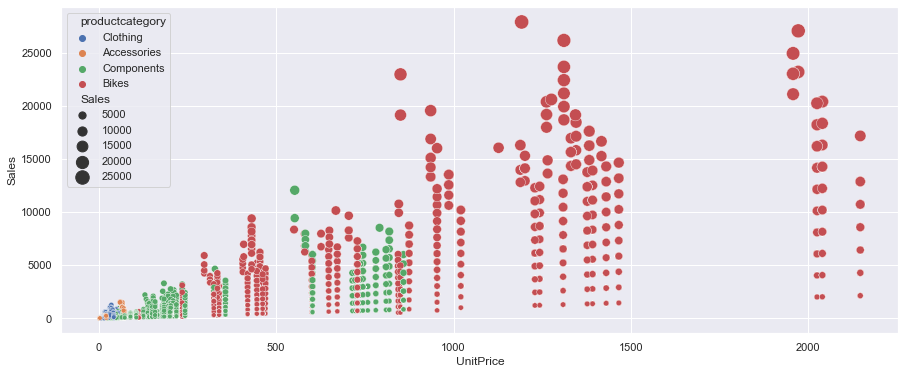

In [64]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data1, x='UnitPrice',y='Sales',hue='productcategory',size='Sales',sizes=(20,200),palette='deep',legend='auto')

In [65]:
# Lets check the correlation using corr method
data1['Discount'].corr(data1['Sales'])

0.1746037573909088

In [66]:
data1['UnitPrice'].corr(data1['Sales'])

0.7249845048376867

In [67]:
#correlation_coef and p_value using pearsonr
#The Pearson correlation coefficient [1] measures the linear relationship between two datasets. 
#The calculation of the p-value relies on the assumption that each dataset is normally distributed.
pearson_coef, p_value = scipy.stats.pearsonr(data1['Discount'],data1['Sales'])
print("Pearson_Correlation_coeffient:",pearson_coef,"and p_value:", p_value)

Pearson_Correlation_coeffient: 0.17460375739090886 and p_value: 0.0


In [68]:
pearson_coef, p_value = scipy.stats.pearsonr(data1['UnitPrice'],data1['Sales'])
print("Pearson_Correlation_coeffient:",pearson_coef,"and p_value:", p_value)

Pearson_Correlation_coeffient: 0.7249845048376866 and p_value: 0.0


In [69]:
pearson_coef, p_value = scipy.stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
print("Pearson_Correlation_coeffient:",pearson_coef,"and p_value:", p_value)

Pearson_Correlation_coeffient: -0.7426106572325057 and p_value: 0.1505558088534455


In [70]:
#get year from date
data1['Year'] = data1['OrderDate'].dt.year
data1.head()

productcategory productsubcategory                product   saleterritory  \
0        Clothing               Caps           AWC Logo Cap  United Kingdom   
1     Accessories              Locks             Cable Lock  United Kingdom   
2        Clothing             Gloves  Full-Finger Gloves, L  United Kingdom   
3        Clothing             Gloves  Full-Finger Gloves, L  United Kingdom   
4        Clothing             Gloves  Full-Finger Gloves, M  United Kingdom   

          Country    City     Sate      Customer     Employee  OrderCount  \
0  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   
1  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   
2  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   
3  United Kingdom  London  England  Linda Martin  Amy Alberts           1   
4  United Kingdom   Berks  England    Gary Suess  Amy Alberts           1   

   ... StandardCost  UnitPrice  UnitPriceDiscount  Discount  ListPrice  \
0  ...         6.92       5.01               0.02      1.40       8.64   
1  ...        10.31      15.00               0.00      0.00      25.00   
2  ...        15.67      22.79               0.00      0.00      37.99   
3  ...        15.67      20.89               0.05     16.72      37.99   
4  ...        15.67      22.79               0.00      0.00      37.99   

   SaleswithStandard  NetSales  OrderQuantity  Sales  Year  
0              96.91    -28.13             14  68.79  2012  
1              61.88     28.12              6  90.00  2012  
2             125.37     56.98              8 182.35  2012  
3             250.73     66.86             16 317.60  2012  
4             109.70     49.86              7 159.56  2012  

[5 rows x 21 columns]

In [71]:
data1['Year'].value_counts()

2013    27583
2012    18946
2014     9836
2011     4515
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year'>

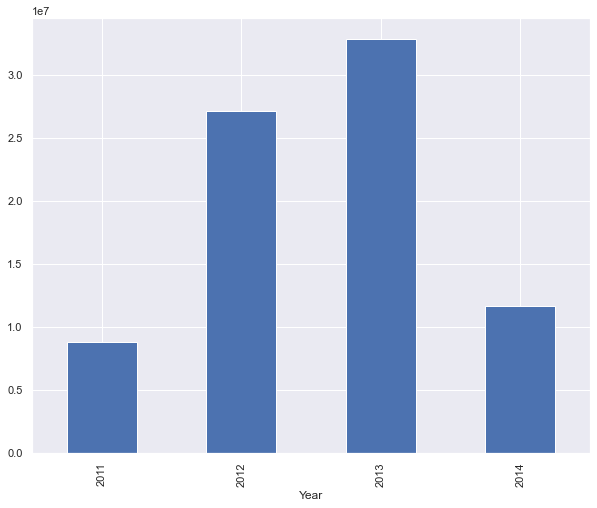

In [72]:
data1.groupby('Year').sum()['Sales'].plot(kind='bar',figsize=(10,8))

In [73]:
#Sales by Month
data1['Month_year'] = data1['OrderDate'].apply(lambda x:x.strftime('%Y-%m'))
data1

productcategory productsubcategory                     product  \
0            Clothing               Caps                AWC Logo Cap   
1         Accessories              Locks                  Cable Lock   
2            Clothing             Gloves       Full-Finger Gloves, L   
3            Clothing             Gloves       Full-Finger Gloves, L   
4            Clothing             Gloves       Full-Finger Gloves, M   
...               ...                ...                         ...   
60875        Clothing             Shorts  Women's Mountain Shorts, L   
60876        Clothing             Shorts  Women's Mountain Shorts, L   
60877        Clothing             Shorts  Women's Mountain Shorts, M   
60878        Clothing             Shorts  Women's Mountain Shorts, S   
60879        Clothing             Shorts  Women's Mountain Shorts, S   

        saleterritory         Country     City     Sate          Customer  \
0      United Kingdom  United Kingdom    Berks  England        Gary Suess   
1      United Kingdom  United Kingdom    Berks  England        Gary Suess   
2      United Kingdom  United Kingdom    Berks  England        Gary Suess   
3      United Kingdom  United Kingdom   London  England      Linda Martin   
4      United Kingdom  United Kingdom    Berks  England        Gary Suess   
...               ...             ...      ...      ...               ...   
60875       Southeast   United States  Decatur  Georgia        Pamela Cox   
60876       Southeast   United States    Miami  Florida  Stephanie Conroy   
60877       Southeast   United States  Decatur  Georgia        Pamela Cox   
60878       Southeast   United States  Decatur  Georgia        Pamela Cox   
60879       Southeast   United States    Miami  Florida  Stephanie Conroy   

          Employee  OrderCount  ... UnitPrice  UnitPriceDiscount  Discount  \
0      Amy Alberts           1  ...      5.01               0.02      1.40   
1      Amy Alberts           1  ...     15.00               0.00      0.00   
2      Amy Alberts           1  ...     22.79               0.00      0.00   
3      Amy Alberts           1  ...     20.89               0.05     16.72   
4      Amy Alberts           1  ...     22.79               0.00      0.00   
...            ...         ...  ...       ...                ...       ...   
60875  Tsvi Reiter           1  ...     41.99               0.00      0.00   
60876  Tsvi Reiter           1  ...     41.99               0.00      0.00   
60877  Tsvi Reiter           1  ...     41.99               0.00      0.00   
60878  Tsvi Reiter           1  ...     41.99               0.00      0.00   
60879  Tsvi Reiter           1  ...     41.99               0.00      0.00   

       ListPrice  SaleswithStandard  NetSales  OrderQuantity  Sales  Year  \
0           8.64              96.91    -28.13             14  68.79  2012   
1          25.00              61.88     28.12              6  90.00  2012   
2          37.99             125.37     56.98              8 182.35  2012   
3          37.99             250.73     66.86             16 317.60  2012   
4          37.99             109.70     49.86              7 159.56  2012   
...          ...                ...       ...            ...    ...   ...   
60875      69.99             209.41    126.54              8 335.95  2014   
60876      69.99             157.06     94.91              6 251.96  2014   
60877      69.99              78.53     47.45              3 125.98  2014   
60878      69.99             130.88     79.09              5 209.97  2014   
60879      69.99              78.53     47.45              3 125.98  2014   

       Month_year  
0         2012-06  
1         2012-06  
2         2012-06  
3         2012-06  
4         2012-06  
...           ...  
60875     2014-05  
60876     2014-05  
60877     2014-05  
60878     2014-05  
60879     2014-05  

[60880 rows x 22 columns]

In [74]:
data1['Month_year'] = data1['OrderDate'].apply(lambda x:x.strftime('%Y-%m'))
data1['Month_year'].value_counts()

2014-03    4643
2013-07    3760
2013-06    3757
2013-10    3029
2014-05    3002
2012-06    2964
2013-09    2906
2012-09    2345
2013-03    2306
2013-05    2189
2012-07    2185
2014-01    2178
2013-12    2077
2011-10    1909
2013-08    1812
2012-10    1732
2012-05    1723
2013-04    1698
2012-12    1664
2012-01    1519
2013-02    1449
2012-08    1406
2013-11    1385
2013-01    1215
2012-03    1112
2011-08    1092
2012-11     983
2012-04     819
2011-07     785
2012-02     494
2011-12     377
2011-05     352
2014-02       8
2014-04       5
Name: Month_year, dtype: int64

In [75]:
months = [month for month, data1 in data1.groupby('Month_year')]
months

['2011-05',
 '2011-07',
 '2011-08',
 '2011-10',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05']

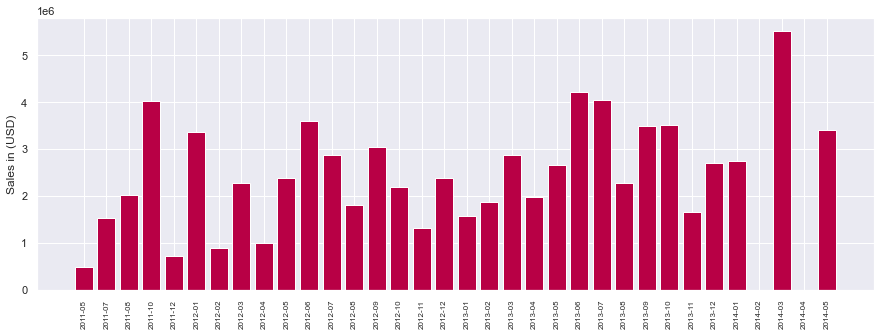

In [76]:
result = data1.groupby('Month_year').sum()['Sales'].reset_index()
plt.figure(figsize=(15,5))
plt.bar(months,result['Sales'],color="#b80045")
plt.xticks(months,rotation='vertical',size=8)
plt.ylabel('Sales in (USD)')
plt.show()

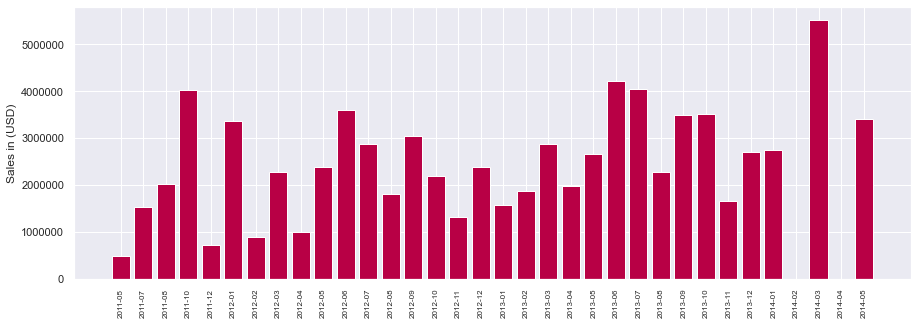

In [77]:
plt.figure(figsize=(15,5))
plt.ticklabel_format(style='plain')
plt.bar(months,result['Sales'],color="#b80045")
plt.xticks(months,rotation='vertical',size=8)
plt.ylabel('Sales in (USD)')
plt.show()

**Anamoly Detection**

In [78]:
#check 2014 data to see why Feb and April is not producing any bars?
# we have two months with very low sales. This is a huge drop if we look at average monthly sale. 
#But following month we have a record breaking month. This is alarming as our sales swing from one extreme to another.
#We need to further examine what is causing this drop.
yr = data1[data1['OrderDate'].dt.year==2014]
yr.groupby('Month_year').sum()['Sales']

Month_year
2014-01   2,738,752.39
2014-02       3,230.65
2014-03   5,526,352.18
2014-04       1,284.79
2014-05   3,415,479.07
Name: Sales, dtype: float64

In [79]:
#compare 2014 data to 2012 or 2013 to check monthly sales amount...
yr11 = data1[data1['OrderDate'].dt.year==2012]
yr11.groupby('Month_year').sum()['Sales']

Month_year
2012-01   3,356,069.34
2012-02     882,899.94
2012-03   2,269,116.71
2012-04   1,001,803.77
2012-05   2,393,689.52
2012-06   3,601,190.71
2012-07   2,885,359.20
2012-08   1,802,154.21
2012-09   3,053,816.33
2012-10   2,185,213.21
2012-11   1,317,541.83
2012-12   2,384,846.59
Name: Sales, dtype: float64

In [80]:
data1.head(1)

productcategory productsubcategory       product   saleterritory  \
0        Clothing               Caps  AWC Logo Cap  United Kingdom   

          Country   City     Sate    Customer     Employee  OrderCount  ...  \
0  United Kingdom  Berks  England  Gary Suess  Amy Alberts           1  ...   

  UnitPrice  UnitPriceDiscount  Discount  ListPrice  SaleswithStandard  \
0      5.01               0.02      1.40       8.64              96.91   

   NetSales  OrderQuantity  Sales  Year  Month_year  
0    -28.13             14  68.79  2012     2012-06  

[1 rows x 22 columns]

In [81]:
#Let's check the Discount to see if this has any impact on the sales.
yr.groupby(['Month_year','productcategory'])['Sales','Discount'].sum()
##check 2014 data to see why Feb and April is not producing any bars?
#we dont have bike and clothing sales in feb and apr 2014

Sales  Discount
Month_year productcategory                       
2014-01    Accessories        19,010.00      1.01
           Bikes           2,431,349.18  2,181.21
           Clothing           54,727.44    364.26
           Components        233,566.99      0.00
2014-02    Accessories            41.99      0.00
           Components          2,141.39      0.00
2014-03    Accessories        68,273.97    600.00
           Bikes           4,444,823.17 18,599.96
           Clothing          150,378.36  2,200.31
           Components        855,667.14     14.73
2014-04    Accessories            41.99      0.00
           Components            713.80      0.00
2014-05    Accessories        38,569.16    241.56
           Bikes           2,716,128.86 11,709.74
           Clothing           83,642.49    962.71
           Components        577,138.55     25.19

In [82]:
bc = data1[data1['productcategory'].isin(['Bikes','Clothing'])]
print(bc['productcategory'].value_counts())
bc = bc[bc['Month_year'].isin(['2014-01','2014-03','2014-05'])]
bc.groupby(['Month_year','productcategory']).sum()[['Sales','Discount']]

Bikes       24800
Clothing    12260
Name: productcategory, dtype: int64


Sales  Discount
Month_year productcategory                       
2014-01    Bikes           2,431,349.18  2,181.21
           Clothing           54,727.44    364.26
2014-03    Bikes           4,444,823.17 18,599.96
           Clothing          150,378.36  2,200.31
2014-05    Bikes           2,716,128.86 11,709.74
           Clothing           83,642.49    962.71

In [83]:
bc.groupby(['Month_year','Country']).sum()[['Sales','Discount']]

Sales  Discount
Month_year Country                              
2014-01    Australia        186,882.16     42.28
           Canada           410,147.76    398.35
           France            76,242.22    312.67
           Germany          130,268.44      0.00
           United Kingdom   273,272.43     91.52
           United States  1,409,263.62  1,700.65
2014-03    Australia        154,922.07      0.00
           Canada           630,378.60  2,610.16
           France           533,018.51  2,925.42
           Germany          295,955.70  1,027.21
           United Kingdom   258,777.05    745.15
           United States  2,722,149.60 13,492.33
2014-05    Australia        191,750.68    295.45
           Canada           461,899.91  2,271.39
           France            95,051.81    327.23
           Germany          112,783.65    226.00
           United Kingdom   356,317.30  2,066.43
           United States  1,581,968.00  7,485.96

In [84]:
#Countries with more number of customers
order_id = pd.DataFrame(data1.groupby('Country')['OrderCount'].count().sort_values(ascending = False))
order_id

OrderCount
Country                   
United States        38809
Canada               11444
France                3530
United Kingdom        3520
Germany               1864
Australia             1713

<AxesSubplot:title={'center':'Most orders for country'}, xlabel='Country'>

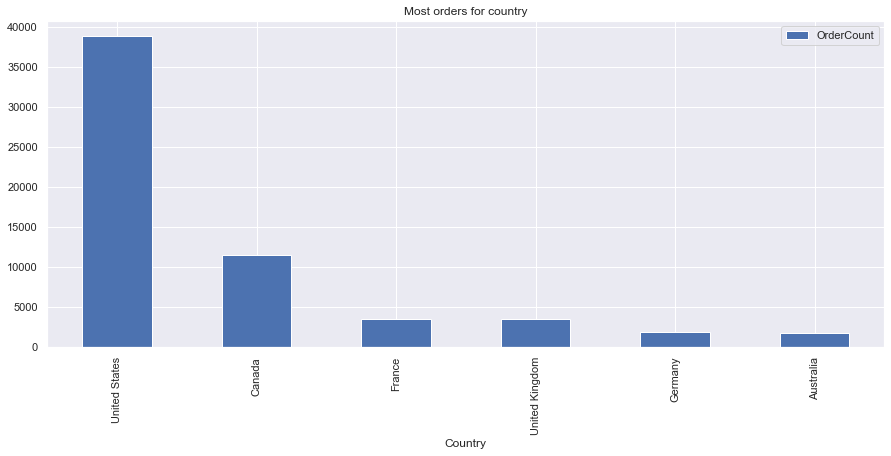

In [85]:
order_id.plot(kind='bar',title='Most orders for country',figsize=(15,6))

<AxesSubplot:title={'center':'Most orders for country'}, xlabel='Country'>

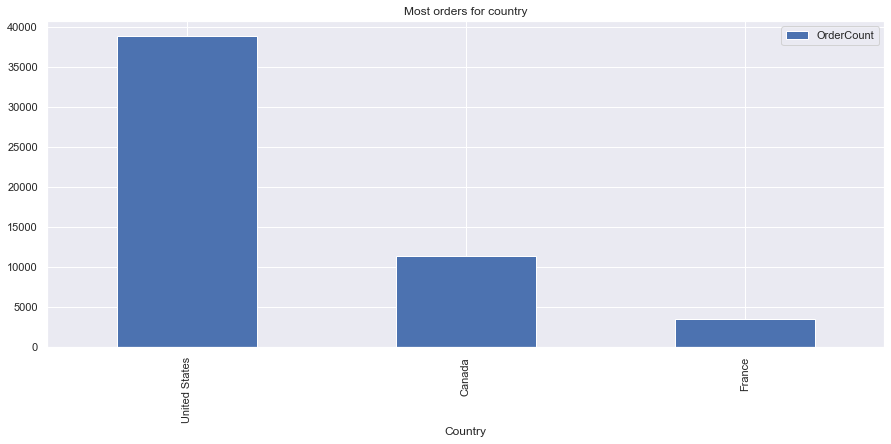

In [86]:
order_id[:3].plot(kind='bar',title='Most orders for country',figsize=(15,6))